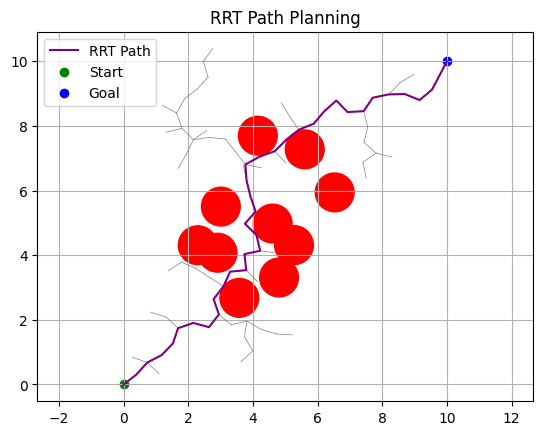

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Node:
    def __init__(self, pos, parent=None):
        self.pos = np.array(pos)
        self.parent = parent

def distance(a, b):
    return np.linalg.norm(np.array(a) - np.array(b))

def nearest_node(tree, point):
    return min(tree, key=lambda node: distance(node.pos, point))

def collision(point, obstacles, threshold=0.6):
    return any(distance(point, obs) < threshold for obs in obstacles)

def rrt(start, goal, obstacles, x_lim, y_lim, step_size=0.5, max_iter=500):
    tree = [Node(start)]
    goal_node = None

    for _ in range(max_iter):
        rand_point = np.random.uniform([x_lim[0], y_lim[0]], [x_lim[1], y_lim[1]])
        nearest = nearest_node(tree, rand_point)
        direction = rand_point - nearest.pos
        direction = direction / np.linalg.norm(direction)
        new_pos = nearest.pos + direction * step_size

        if collision(new_pos, obstacles):
            continue

        new_node = Node(new_pos, nearest)
        tree.append(new_node)

        if distance(new_pos, goal) < 1.0:
            goal_node = Node(goal, new_node)
            tree.append(goal_node)
            break

    # Reconstruct path
    if goal_node:
        path = []
        node = goal_node
        while node:
            path.append(node.pos)
            node = node.parent
        return tree, path[::-1]
    else:
        return tree, []

# Parameters
start = [0, 0]
goal = [10, 10]
obstacles = [np.random.uniform(2, 8, 2) for _ in range(10)]

# Run RRT
tree, path = rrt(start, goal, obstacles, x_lim=(0, 12), y_lim=(0, 12))

# Plot
plt.figure()
for node in tree:
    if node.parent is not None:
        plt.plot([node.pos[0], node.parent.pos[0]],
                 [node.pos[1], node.parent.pos[1]], color='gray', linewidth=0.5)

if path:
    path = np.array(path)
    plt.plot(path[:,0], path[:,1], color='purple', label='RRT Path')

for obs in obstacles:
    circle = plt.Circle(obs, 0.6, color='red')
    plt.gca().add_patch(circle)

plt.scatter(*start, color='green', label='Start')
plt.scatter(*goal, color='blue', label='Goal')
plt.legend()
plt.axis('equal')
plt.title("RRT Path Planning")
plt.grid(True)
plt.show()
